Dog vs Cat classifier by TFlearn

In [1]:
import tflearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
from random import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization

In [3]:
from tensorflow.python.client import device_lib

In [4]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6143417922183432069, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3239886848
 locality {
   bus_id: 1
 }
 incarnation: 582489442860582084
 physical_device_desc: "device: 0, name: GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"]

In [5]:
with tf.device('/device:GPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')

c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True, allow_soft_placement = True))
print (sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [20]:
dataPath = 'train/train/'

In [11]:
# pal: -1 (RGBA); 0 (grayscale); 1 (RGB)
def loadAndResize(imgPath, *, size=64, pal=1, fill=True):
    img = cv2.imread(imgPath, pal)
    if img is None:
        raise FileNotFoundError(f'File >{imgPath}< not found.')
    if fill:
        shape = np.shape(img)
        if shape[0] > shape[1]:
            bSize = int((shape[0] - shape[1])/2)
            img = cv2.copyMakeBorder(img,0,0,bSize,bSize,cv2.BORDER_CONSTANT,value=[0,0,0])
        else:
            bSize = int((shape[1] - shape[0])/2)
            img = cv2.copyMakeBorder(img,bSize,bSize,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
    if pal != 0:
        return cv2.cvtColor(cv2.resize(img, (size, size)), cv2.COLOR_BGR2RGB)
    else: 
        return cv2.resize(img, (size, size))

In [ ]:
path = 'train/train/cat.97.jpg'
img = loadAndResize(path, size=32, pal=1, fill=True)
plt.imshow(img, cmap='gray')
plt.show()

In [64]:
# 'onehot'
cat = [1, 0]
dog = [0, 1]

In [133]:
dataArray = []
for file in tqdm(os.listdir(dataPath)):
    if file[:3] == 'cat':
        label = cat
    elif file[:3] == 'dog':
        label = dog
    else:
        label = [0, 0]
    imgPath = dataPath+file
    img = loadAndResize(imgPath, size=32, pal=1, fill=False)
    dataArray.append([label, img])    

100%|███████████████████████████████████| 25000/25000 [00:51<00:00, 481.28it/s]


In [134]:
# saving data array
np.save('32x32_rgb.npy', dataArray)

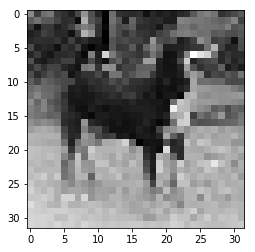

In [88]:
plt.imshow(dataArray[23302][1])
plt.show()

In [5]:
# loading data
data = np.load('32x32_rgb.npy')

In [6]:
#y_data, x_data = data.transpose()
x_data = np.array([i[1] for i in data]).reshape(-1, 32, 32, 3)
y_data = [i[0] for i in data]

In [4]:
np.shape(x_data)

(25000, 32, 32, 3)

In [5]:
# shuffling and splitting
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [6]:
np.shape(x_train)

(20000, 32, 32, 3)

In [7]:
y_train = np.vstack(y_train)
y_test = np.vstack(y_test)

In [8]:
imgSize = 32
pal = 3 # 3 for RGB

In [9]:
len(x_train[:2000])

2000

In [10]:
X_train = x_train#[:2000]
Y_train = y_train#[:2000]
X_test = x_test#[:500]
Y_test = y_test#[:500]

In [11]:
np.shape(x_train)

(20000, 32, 32, 3)

In [12]:
np.shape(X_train)

(20000, 32, 32, 3)

In [13]:
np.shape(Y_train)

(20000, 2)

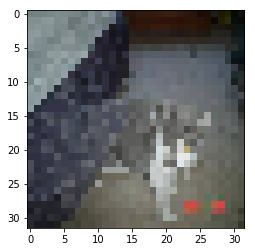

[1 0]


In [14]:
i = 12021
plt.imshow(X_train[i].reshape(32,32,3))
plt.show()
print (Y_train[i])

In [3]:
imgSize = 32
pal = 3

# loading data
data = np.load('32x32_rgb.npy')

#y_data, x_data = data.transpose()
x_data = np.array([i[1] for i in data]).reshape(-1, 32, 32, 3)
y_data = [i[0] for i in data]

# shuffling and splitting
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

y_train = np.vstack(y_train)
y_test = np.vstack(y_test)

X_train = x_train#[:2000]
Y_train = y_train#[:2000]
X_test = x_test#[:500]
Y_test = y_test#[:500]

In [8]:
with tf.device('/device:GPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')

#for i in range(100000):
c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(c)

array([[ 22.,  28.],
       [ 49.,  64.]], dtype=float32)

In [14]:
# reset
tf.reset_default_graph()

tflearn.init_graph(num_cores=4, gpu_memory_fraction=0.5, soft_placement=True)

# input layer
inp = input_data(shape=[None, imgSize, imgSize, 3], name = 'input')

# conv_2d and pooling layers
conv1 = conv_2d(inp, 64, 2, activation='relu')
pool1 = max_pool_2d(conv1, 2)

conv2 = conv_2d(pool1, 64, 2, activation='relu')
pool2 = max_pool_2d(conv2, 2)

conv3 = conv_2d(pool2, 64, 2, activation='relu')
pool3 = max_pool_2d(conv3, 2)

conv4 = conv_2d(pool3,64, 2, activation='relu')
pool4 = max_pool_2d(conv4, 2)

conv5 = conv_2d(pool4, 64, 2, activation='relu')
pool5 = max_pool_2d(conv5, 2)

conv6 = conv_2d(pool5,64, 2, activation='relu')
pool6 = max_pool_2d(conv6, 2)

# fully connected deep neural network
fc1 = fully_connected(pool6, 512, activation='relu')
drop1 = dropout(fc1, 0.8)
out = fully_connected(drop1, 2, activation='softmax')

# output layer
cnn = regression(out, optimizer='adam', learning_rate=1e-3, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(cnn, tensorboard_dir = 'log', tensorboard_verbose=3)


In [32]:
model.fit({'input': X_train}, {'targets': Y_train}, n_epoch=1, validation_set=({'input': X_test}, {'targets': Y_test}), 
    snapshot_step=100, show_metric=True, run_id='dogVcat')

---------------------------------
Run id: dogVcat
Log directory: log/
INFO:tensorflow:Summary name Accuracy/Adam_0 (raw) is illegal; using Accuracy/Adam_0__raw_ instead.
INFO:tensorflow:Summary name Accuracy_1/Adam_1 (raw) is illegal; using Accuracy_1/Adam_1__raw_ instead.
---------------------------------
Training samples: 40000
Validation samples: 10000
--


InvalidArgumentError: You must feed a value for placeholder tensor 'input_1/X' with dtype float and shape [?,32,32,3]
	 [[Node: input_1/X = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: FullyConnected_3/BiasAdd/_23 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_125_FullyConnected_3/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'input_1/X', defined at:
  File "E:\ProgramData\Miniconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\ProgramData\Miniconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\ProgramData\Miniconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\ProgramData\Miniconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\ProgramData\Miniconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\ProgramData\Miniconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\ProgramData\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\ProgramData\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\ProgramData\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\ProgramData\Miniconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\ProgramData\Miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-1ad1ecd3c9c5>", line 7, in <module>
    inp = input_data(shape=[None, imgSize, imgSize, 3], name = 'input')
  File "E:\ProgramData\Miniconda3\lib\site-packages\tflearn\layers\core.py", line 81, in input_data
    placeholder = tf.placeholder(shape=shape, dtype=dtype, name="X")
  File "E:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1599, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "E:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3090, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "E:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "E:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "E:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'input_1/X' with dtype float and shape [?,32,32,3]
	 [[Node: input_1/X = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: FullyConnected_3/BiasAdd/_23 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_125_FullyConnected_3/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [29]:
model.save("32x32_rgb_alexNet_22epoch")

Dla 32x32_gray_sq
Training Step: 625  | total loss: 0.62602 | time: 30.830s
| Adam | epoch: 002 | loss: 0.62602 - acc: 0.6475 -- iter: 19968/20000
Training Step: 626  | total loss: 0.61981 | time: 32.439s
| Adam | epoch: 002 | loss: 0.61981 - acc: 0.6484 | val_loss: 0.61314 - val_acc: 0.6658 -- iter: 20000/20000

In [16]:
# reset
tf.reset_default_graph()

tflearn.init_graph(num_cores=3, gpu_memory_fraction=0.5, soft_placement=True)

# Building 'AlexNet'
#network = input_data(shape=[None, 227, 227, 3])
network = input_data(shape=[None, 32, 32, 3], name = 'input')
network = conv_2d(network, 96, 11, strides=4, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 256, 5, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='linear')
network = regression(network, optimizer='momentum',
                     loss='categorical_crossentropy', learning_rate=0.001, name='targets')

# Training
model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                    max_checkpoints=1, tensorboard_verbose=0)


In [ ]:
model.fit(X, Y, n_epoch=1000, validation_set=0.1, shuffle=True,
          show_metric=True, batch_size=64, snapshot_step=200,
          snapshot_epoch=False, run_id='alexnet_oxflowers17')

In [24]:
model.fit({'input': X_train}, {'targets': Y_train}, n_epoch=20, validation_set=({'input': X_test}, {'targets': Y_test}), 
    snapshot_step=500, show_metric=True, run_id='dogVcatAlex')

Training Step: 6572  | total loss: 0.66923 | time: 72.752s
| Momentum | epoch: 021 | loss: 0.66923 - acc: 0.7862 -- iter: 19968/20000
Training Step: 6573  | total loss: 0.67519 | time: 74.074s
| Momentum | epoch: 021 | loss: 0.67519 - acc: 0.7889 | val_loss: 1.08609 - val_acc: 0.7178 -- iter: 20000/20000
--


In [25]:
model.fit(x_data, y_data, n_epoch=2, validation_set=0.1, shuffle=True, batch_size=64,
    snapshot_step=500, show_metric=True, snapshot_epoch=False, run_id='dogVcatAlex')

Training Step: 7277  | total loss: 0.83033 | time: 80.465s
| Momentum | epoch: 023 | loss: 0.83033 - acc: 0.8334 -- iter: 22500/22500


In [ ]:
Dla 32x32 rgb 5 epoch 6x conv_2d 64 zapisany jako "32x32_rgb_5epoch_2"
Training Step: 1564  | total loss: 0.45375 | time: 54.752s
| Adam | epoch: 005 | loss: 0.45375 - acc: 0.7889 -- iter: 19968/20000
Training Step: 1565  | total loss: 0.44643 | time: 57.749s
| Adam | epoch: 005 | loss: 0.44643 - acc: 0.7897 | val_loss: 0.52722 - val_acc: 0.7346 -- iter: 20000/20000

In [33]:
a= model.get_weights(conv1.W)

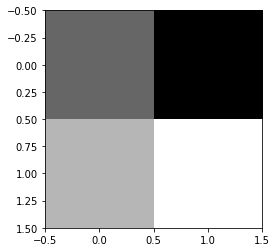

In [98]:
np.shape(a[:,:,0,0])
plt.imshow(a[:,:,1,1], cmap='gray')
plt.show()

[-0.1993233   0.36422405  0.1609071   0.25161424 -0.07743172 -0.5798052
  0.36876759 -0.10844667 -0.48757523  0.0526137   0.01635405  0.30735913
  0.07678784  0.03685051 -0.03925821 -0.47774184  0.44665053 -0.01418198
  0.19360572  0.12530039  0.35972649  0.40870118  0.27792007  0.32383284
  0.35780084  0.12330174 -0.4482801  -0.16800912 -0.10941344  0.28307259
 -0.45504901 -0.27657643  0.38025376 -0.18032031  0.15933058  0.05784986
 -0.39832413  0.50624835 -0.38004115 -0.23503809  0.26861179 -0.05473418
  0.1978012   0.27152988  0.22259973 -0.10495927  0.36233294 -0.03777635
 -0.13867278  0.20226513 -0.18932474  0.20118061  0.08462472  0.05703386
  0.13300715  0.00381051  0.18060833  0.1730331   0.2837384   0.33721915
 -0.10079468 -0.28829798  0.05560361 -0.30042154]
(64,)


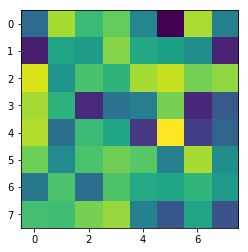

In [55]:
a= model.get_weights(conv1.W)
print (a[0][0][2])
print (np.shape(a[0][0][0]))
plt.imshow(a[0][0][2].reshape(8,8))
plt.show()

In [76]:
a[:][:][0][0]

(3, 64)

In [77]:
a

array([[[[-0.32055947,  0.28483343,  0.16479571, -0.40249917,  0.11584079,
           0.14109536, -0.06919578, -0.32498595, -0.51821858,  0.07099102,
          -0.43031576, -0.1939317 , -0.01621412, -0.5353111 , -0.0214664 ,
           0.55404645, -0.25717041,  0.07998914,  0.40589741,  0.13964817,
           0.03965844, -0.34495708, -0.39081636,  0.17555247,  0.23363307,
           0.45099691,  0.39668491, -0.38447285, -0.50639385,  0.12824465,
          -0.00104914, -0.02355938,  0.03993056,  0.20155317, -0.35833681,
          -0.37435642, -0.24907508, -0.06453323, -0.39495718,  0.35707244,
          -0.44460306,  0.39410332, -0.503236  , -0.0639666 , -0.22148375,
           0.04273763, -0.06247628,  0.44928125, -0.48652896, -0.25953883,
           0.39058113,  0.28613263,  0.0091463 , -0.25111777,  0.174049  ,
           0.00094358, -0.45385924,  0.34398207,  0.26764813, -0.04704221,
           0.48214084,  0.07286244,  0.18268402, -0.3343513 ],
         [-0.52758056, -0.15599664, -

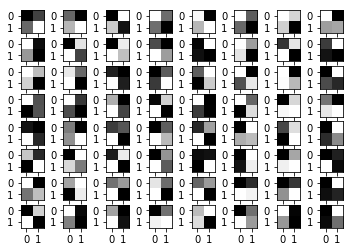

In [105]:
f, axarr = plt.subplots(8, 8)
'''axarr[0, 0].imshow(a[0][0][0].reshape(8,8))
axarr[1, 0].imshow(a[0][0][0].reshape(8,8))
axarr[0, 1].imshow(a[0][0][0].reshape(8,8))
axarr[1, 1].imshow(a[0][0][0].reshape(8,8))
'''
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(a[:,:,1,i*8+j], cmap='gray')
plt.show()

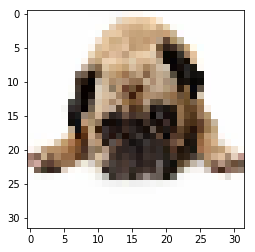

array([[ 2.87998557,  5.24917555]], dtype=float32)

In [31]:
img = loadAndResize('pies1.jpg', size=32, fill=False, pal=1)
plt.imshow(img)
plt.show()
img = img.reshape(-1, 32, 32, 3)
model.predict(img)

In [32]:
img2 = cv2.putText(img,"Hello World!!!")

TypeError: Required argument 'org' (pos 3) not found

In [18]:
tf.variable_scope('conv1')